In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import skew, kurtosis

df = pd.read_excel("beauty.xlsx")
df.head()

,wage,lwage,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,educ
0,5.73,1.745715,30,4,0,1,0,1,1,0,0,1,1,14
1,4.28,1.453953,28,3,0,1,0,1,1,1,0,1,0,12
2,7.96,2.074429,35,4,0,1,0,1,0,0,0,1,0,10
3,11.57,2.448416,38,3,0,1,0,0,1,0,1,0,1,16
4,11.42,2.435366,27,3,0,1,0,0,1,0,0,1,0,16


In [28]:
#Ques1: Data Exploration
vars = ["wage", "lwage", "educ", "exper", "looks"]
df[vars].describe()
print("Descriptive Statistics:")
print(df[vars].describe())
for col in ["wage", "lwage"]:
    print(f"{col}= Skewness: {df[col].skew()}, Kurtosis: {df[col].kurt()}")

Descriptive Statistics:
              wage        lwage         educ        exper        looks
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000
mean      6.306690     1.658800    12.563492    18.206349     3.185714
std       4.660639     0.594508     2.624489    11.963485     0.684877
min       1.020000     0.019803     5.000000     0.000000     1.000000
25%       3.707500     1.310357    12.000000     8.000000     3.000000
50%       5.300000     1.667705    12.000000    15.000000     3.000000
75%       7.695000     2.040570    13.000000    27.000000     4.000000
max      77.720000     4.353113    17.000000    48.000000     5.000000
wage= Skewness: 4.8192044939496546, Kurtosis: 51.22120116313635
lwage= Skewness: 0.08333412347927915, Kurtosis: 0.4314718014935921


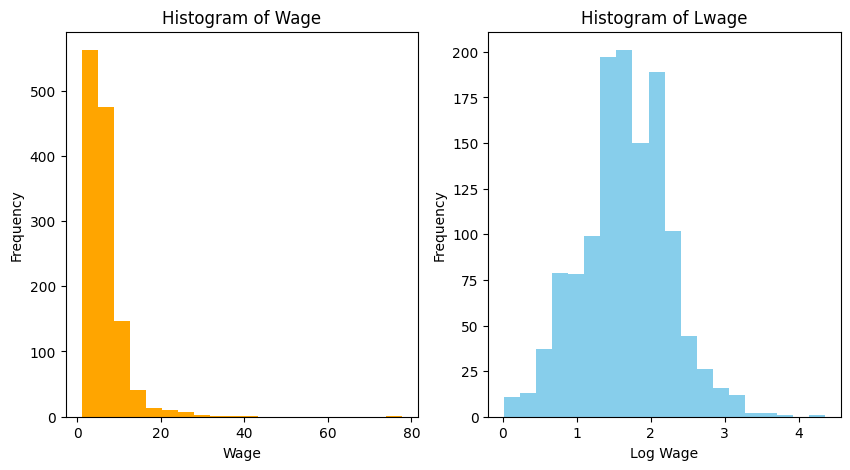

In [29]:
#Histogram
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(df["wage"].dropna(), bins=20, color='orange')
plt.title("Histogram of Wage")
plt.xlabel("Wage")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df["lwage"].dropna(), bins=20, color='skyblue')
plt.title("Histogram of Lwage")
plt.xlabel("Log Wage")
plt.ylabel("Frequency")

plt.show()

## Answer Question 1.2

Skewness and Kurtosis are used to describe the spread and height of a normal distribution.

The wage histogram is highly right-skewed (skewness approx 4.82) and has extremely high kurtosis approx 51.22. It creates a right tail, meaning most people earn relatively low wages, with a few people earning high wages.

The lwage histogram looks more balanced and bell-shaped. It spreads out the lower ones, reducing skewness, more symmetric and also makes the distribution more normal.

The lwage is more suitable as the dependent variable in linear regression analysis because it makes the distribution more symmetric and normal, i.e, the relationship between variables is closer to linear. Therefore, it gives more reliable and interpretable results.

In [30]:
#Ques2: Simple Linear Regression

simple_model = smf.ols("lwage ~ looks", data=df).fit()
print(simple_model.summary())

b_looks_simple = simple_model.params["looks"]
sterr_looks_simple = simple_model.bse["looks"]
t_looks_simple = simple_model.tvalues["looks"]
p_looks_simple = simple_model.pvalues["looks"]

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.349
Date:                Mon, 20 Oct 2025   Prob (F-statistic):             0.0372
Time:                        21:41:15   Log-Likelihood:                -1130.0
No. Observations:                1260   AIC:                             2264.
Df Residuals:                    1258   BIC:                             2274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4965      0.080     18.798      0.0

### Answer Question 2.1

The estimated coefficients are: 
$$
\hat{\beta}_1 = 0.0510 \quad \hat{\beta}_0 = 1.4965
$$

The standard error SE is:
$$
\text{SE}(\hat{\beta}_1) = 0.024
$$

The coefficient of determination is: R-squared = 0.003

### Answer Question 2.2
It implies that, on average, a one-unit increase in attractiveness is associated with about a 5.1% higher wage, suggesting a small but statistically significant positive relationship between attractiveness and wages.

### Answer Question 2.3
#### Hypothesis Test for the Effect of Physical Attractiveness on Wages


#### Step 1: State the Hypotheses

$$
H_0: \beta_1 = 0 \quad \text{(physical attractiveness has no effect on wages)}
$$
$$
H_a: \beta_1 \neq 0 \quad \text{(physical attractiveness affects wages)}
$$

#### Step 2: Test Statistic

From the regression output:

$$
\hat{\beta}_1 = 0.0510, \quad \text{SE}(\hat{\beta}_1) = 0.024, \quad t = 2.085, \quad p = 0.037
$$

#### Step 3: Decision Rule

At a significance level of $ \alpha = 0.05 $:

$$
p = 0.037 < 0.05 \implies \text{Reject } H_0
$$

#### Step 4: Conclusion

There is statistically significant evidence at the 5% level that physical attractiveness ${looks}$ has an effect on wages.

$$
\boxed{p = 0.037 < 0.05 \Rightarrow \text{Reject } H_0. \text{ Physical attractiveness significantly affects wages.}}
$$

## 3. Multiple Linear Regression

#### 3.1 Regression Results for Multiple Linear Regression Model 

$$
lwage=β_0​+β_1​looks+β_2​educ+β_3​exper+β_4​female+β_5​union+β_6​married+β_7​goodhlth+β_8​black+β_9​service+ε

In [31]:
formula = "lwage ~ looks + female + married + goodhlth + black + union + educ + exper + service"
multi_model = smf.ols(formula, data=df).fit()
print(multi_model.summary())

# to save the coefficients and stats from the multiple regression model for answers
b_looks_multi = multi_model.params["looks"]
se_looks_multi = multi_model.bse["looks"]
t_looks_multi = multi_model.tvalues["looks"]
p_looks_multi = multi_model.pvalues["looks"]
conf_int_looks_multi = multi_model.conf_int().loc["looks"]  # 95% CI

print(conf_int_looks_multi)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     81.95
Date:                Mon, 20 Oct 2025   Prob (F-statistic):          2.20e-119
Time:                        21:41:15   Log-Likelihood:                -839.97
No. Observations:                1260   AIC:                             1700.
Df Residuals:                    1250   BIC:                             1751.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2489      0.111      2.234      0.0

#### 3.2 Comparison Between 2 Estimated Coefficients

In [32]:
print(f"The estimated coefficient for looks in the simple regression model is {round((b_looks_simple), 4)}")
print(f"The estimated coefficient for looks in the multiple regression model is {round((b_looks_multi), 4)}")

The estimated coefficient for looks in the simple regression model is 0.051
The estimated coefficient for looks in the multiple regression model is 0.0535


The simple regression model in question 2 estimates how looks abd lwage move together without accounting for the other explanatory variables. On the other hand, the multiple regression model estimates the effect of looks while holding the other variables (female, married, goodhlth, black, union, educ, exper, and service) constant.

In the simple regression model the coefficient is 0.051. After adding the other variable that may have an impact on a person's wage and attractiveness, the estimated coefficient on looks becomes 0.0535. 

This change tells us that the other variables have indeed an impact on a person's wage and if they are omitted, we have a biased coefficient, as we left out relevant variables that are correlated with both physical attractiveness (looks) and the variable of natural log of wage (lwage).

We can conclude that the simple regression model is biased downward by 0.0025.

#### 3.3 Does Physical Attractiveness Still Have a Statistically Significant Effect on Wages?

$$
H_0: \beta_1 = 0 \quad \text{(physical attractiveness has no effect on wages)}
$$
$$
H_a: \beta_1 \neq 0 \quad \text{(physical attractiveness affects wages)}
$$

If p < 0.05 → reject H0 at 5% significance → looks is statistically significant.

If p ≥ 0.05 → do not reject H0 → cannot claim looks has a statistically significant effect.

In [33]:
alpha = 0.05
if p_looks_multi < alpha:
    print(f"P-value of the multiple regression model equals {round(p_looks_multi,4)}, which is smaller than 0.05; therefore, we reject H0: ")
else:
    print(f"We cannot reject H0")

P-value of the multiple regression model equals 0.0074, which is smaller than 0.05; therefore, we reject H0: 


After controlling for variables such as education, experience, gender, union membership, marital status, health, race, and service industry, the coefficient on looks is 0.0535, with a standard error of 0.020, and p-value of 0.0074.

Since 0.0074 < 0.05, at the 5% significance level we reject the null hypothesis.

Conclusion: Physical attractiveness appears to have a statistically significant positive effect on the variable natural log of wage (lwage).

## 4. Exploring Non-linear Relationships and Interactions

#### 4.1 Non-linearity of the experiment


In [14]:
df["exper2"] = df["exper"]**2
formula2 = "lwage ~ looks + female + married + goodhlth + black + union + educ + exper + exper2 + service "

$$
lwage=β_0​+β_1​looks+β_2​educ+β_3​exper+β_3​exper^2+β_5​female+β_6​union+β_7​married+β_8​goodhlth+β_9​black+β_10​service+ε

In [15]:
multi_model2 = smf.ols(formula2, data=df).fit()

# to save the coefficients and stats from the multiple regression model for answers
b_looks_multi2 = multi_model2.params["looks"]
se_looks_multi2 = multi_model2.bse["looks"]
t_looks_multi2 = multi_model2.tvalues["looks"]
p_looks_multi2 = multi_model2.pvalues["looks"]
conf_int_looks_multi2 = multi_model2.conf_int().loc["looks"]  # 95% CI


df_resid = multi_model2.df_resid
p_value_looks_manual = 2 * (1 - stats.t.cdf(abs(t_looks_multi2), df=df_resid))

print(f"t = {t_looks_multi2:.3f}, p = {p_value_looks_manual:.4f}")
print(f"The estimated coefficient for looks in the multiple regression model using the experience linearility control is {round((b_looks_multi2), 4)}")

t = 2.843, p = 0.0045
The estimated coefficient for looks in the multiple regression model using the experience linearility control is 0.0558


After including the squared term of experience, the estimated coefficient for looks remains positive (β̂ = 0.0558) and statistically significant (t = 2.843, p = 0.0045).
This means that, even after accounting for the diminishing effect of experience on wages, physical attractiveness continues to have a positive impact on earnings.
On average, a one-unit increase in beauty rating is associated with approximately a 5.6% increase in hourly wages.

#### 4.2 Interaction between beauty and genre

In [11]:
df["looks_female"] = df["looks"] * df["female"]

formula3 = "lwage ~ looks + female + looks_female + married + goodhlth + black + union + educ + exper + exper2 + service "

$$
lwage=β_0​+β_1​looks+β_2​educ+β_3​exper+β_3​exper^2+β_5​female+β_6​union+β_7​married+β_8​goodhlth+β_9​black+β_10​service+β_11looks_female+ε

In [12]:
multi_model3 = smf.ols(formula3, data=df).fit()

# Extract coefficient and stats for 'looks'
b_looks_multi3 = multi_model3.params["looks"]
se_looks_multi3 = multi_model3.bse["looks"]
t_looks_multi3 = multi_model3.tvalues["looks"]
p_looks_multi3 = multi_model3.pvalues["looks"]
conf_int_looks_multi3 = multi_model3.conf_int().loc["looks"]

from scipy import stats
df_resid = multi_model3.df_resid
p_value_looks_manual = 2 * (1 - stats.t.cdf(abs(t_looks_multi3), df=df_resid))

print(f"The estimated coefficient for looks in the multiple regression model with exper² and interaction is {b_looks_multi3:.4f}")
print(f"t = {t_looks_multi3:.3f}, p = {p_value_looks_manual:.4f}")
print(f"95% CI: [{conf_int_looks_multi3[0]:.4f}, {conf_int_looks_multi3[1]:.4f}]")

The estimated coefficient for looks in the multiple regression model with exper² and interaction is 0.0371
t = 1.495, p = 0.1351
95% CI: [-0.0116, 0.0859]


The interaction term looks_female captures whether the effect of physical attractiveness on wages differs for women compared to men.
A significant and negative coefficient would indicate that the beauty premium is smaller for women than for men, while a positive coefficient would imply the opposite.

In this model, the estimated coefficient on looks_female is β̂ = 0.0371, with t = 1.495 and p = 0.1351.
This means that, after controlling for experience non-linearity and other covariates, there is no clear difference in the effect of attractiveness on wages between genders.

In other words, the “beauty premium” appears to be similar for men and women in this dataset.